In [11]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns

Read csv file

In [12]:
df = pd.read_csv('pet_adoption_center.csv')
df.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets
0,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,2024-10-10,True,2025-03-11,A0001,Megan Rogers,56,Mcgeestad,1
1,P0002,Brian,Cat,Tonkinese,1,Female,Golden,2023-09-09,True,2024-02-10,A0002,Jonathan Hawkins,18,Geneshire,2
2,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,2023-10-03,False,2023-10-17,NaN,NaN,-1,NaN,0
3,P0004,Karl,Dog,German Shepherd,1,Female,White,2024-07-28,True,2024-08-12,A0004,Natalie Rivera,51,North Richard,3
4,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2024-02-21,False,2024-02-26,NaN,NaN,-1,NaN,0


Show me the names of all the columns in the DataFrame.

In [13]:
df.columns

Index(['pet_id', 'pet_name', 'species', 'breed', 'age_years', 'gender',
       'color', 'arrival_date', 'adopted', 'adoption_date', 'adopter_id',
       'adopter_name', 'adopter_age', 'adopter_city', 'adopter_previous_pets'],
      dtype='object')

Summary of your DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             118 non-null    object
 11  adopter_name           118 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           118 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
dtypes: bool(1), int64(3), o

Summary stats for all columns

In [15]:
df.describe()

,age_years,adopter_age,adopter_previous_pets
count,200.000000,200.000000,200.000000
mean,7.545000,27.830000,1.465000
std,4.512181,27.677088,1.798597
min,1.000000,-1.000000,0.000000
25%,4.000000,-1.000000,0.000000
50%,7.000000,26.500000,0.000000
75%,12.000000,55.250000,3.000000
max,15.000000,75.000000,5.000000


Check for missing values

In [16]:
df.isnull().sum()

pet_id                    0
pet_name                  0
species                   0
breed                     0
age_years                 0
gender                    0
color                     0
arrival_date              0
adopted                   0
adoption_date             0
adopter_id               82
adopter_name             82
adopter_age               0
adopter_city             82
adopter_previous_pets     0
dtype: int64

Fill missing values

In [17]:
df['adopter_id'] = df['adopter_id'].fillna(0)
df['adopter_name'] = df['adopter_name'].fillna('Unknown')
df['adopter_city'] = df['adopter_city'].fillna('Unknown')

In [18]:
df.isnull().sum()

pet_id                   0
pet_name                 0
species                  0
breed                    0
age_years                0
gender                   0
color                    0
arrival_date             0
adopted                  0
adoption_date            0
adopter_id               0
adopter_name             0
adopter_age              0
adopter_city             0
adopter_previous_pets    0
dtype: int64

How many rows and columns do you have?

In [19]:
df.shape

(200, 15)

Any missing values in key columns like adopter_id, adopter_name, adopter_city

How many pets were adopted?

In [20]:
adopted_count = df['adopted'].sum()
adopted_count

np.int64(118)

Which species is most common?

In [21]:
most_common_species = df['species'].value_counts().idxmax()
count = df['species'].value_counts().max()
count

np.int64(45)

What percentage of each species got adopted?

In [22]:
summary = df.groupby('species').agg(total_pets = ('pet_id', 'count'),
                                    adopted_pets = ('adopted', 'sum')
                                    )
summary

,total_pets,adopted_pets
species,,
Bird,36,25
Cat,45,25
Dog,43,27
Hamster,44,24
Rabbit,32,17


In [23]:
summary['adoption_percentage'] = (summary['adopted_pets'] / summary['total_pets']) * 100

summary

,total_pets,adopted_pets,adoption_percentage
species,,,
Bird,36,25,69.444444
Cat,45,25,55.555556
Dog,43,27,62.790698
Hamster,44,24,54.545455
Rabbit,32,17,53.125000


How long pets waited for adoption

In [24]:
# Convert to datetime (just to be sure)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['adoption_date'] = pd.to_datetime(df['adoption_date'])

In [25]:
# Filter adopted pets
df_adopted = df[df['adopted']==True].copy()

In [26]:
# Calculate wait days
df_adopted['wait_day'] = (df_adopted['adoption_date'] - df_adopted['arrival_date']).dt.days
# Check for negative wait days (possible data errors)
negative_wait_days = df_adopted[df_adopted['wait_day'] < 0]
print(df_adopted[df_adopted['wait_day'] >= 0]['wait_day'].describe())

count    118.000000
mean      79.889831
std       53.254073
min        1.000000
25%       40.500000
50%       70.500000
75%      121.000000
max      180.000000
Name: wait_day, dtype: float64


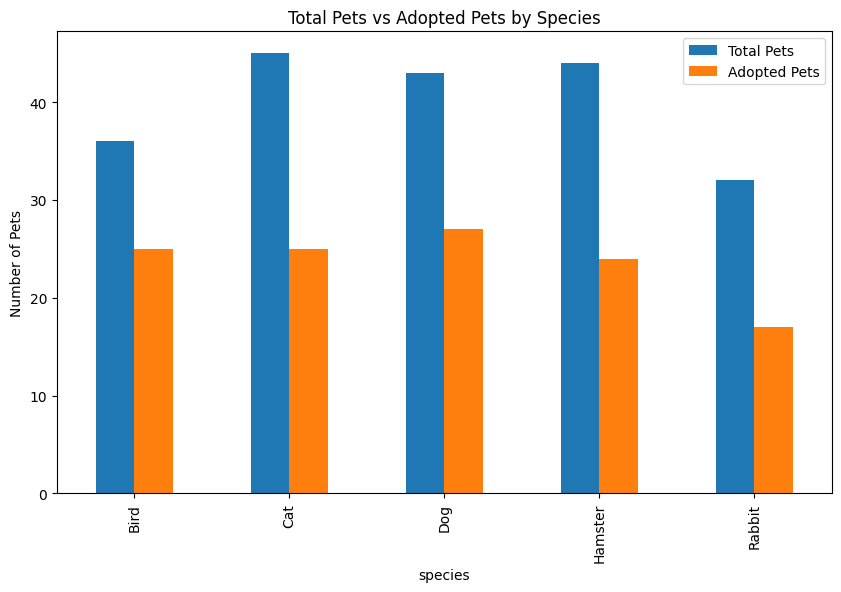

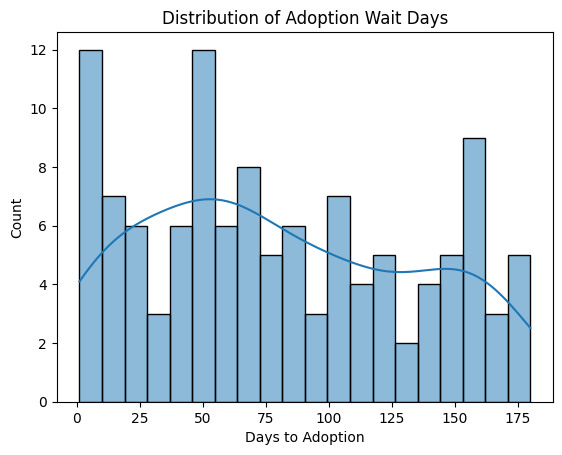

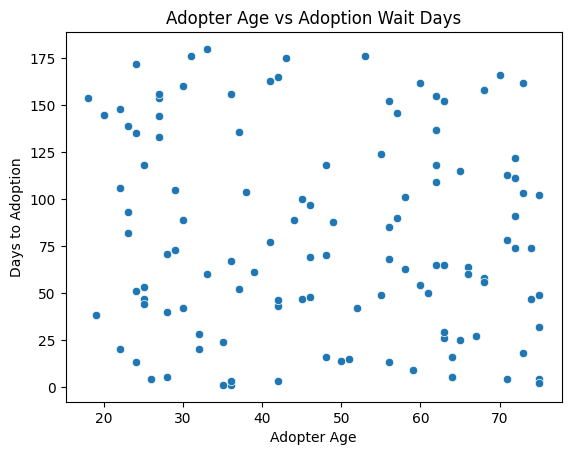

In [27]:
# 1. Bar plot: total pets vs adopted pets by species
species_counts = df.groupby('species')['pet_id'].count()
species_adopted = df[df['adopted'] == True].groupby('species')['pet_id'].count()

adoption_df = pd.DataFrame({
    'Total Pets': species_counts,
    'Adopted Pets': species_adopted
}).fillna(0)

adoption_df.plot(kind='bar', figsize=(10,6))
plt.title('Total Pets vs Adopted Pets by Species')
plt.ylabel('Number of Pets')
plt.show()

# 2. Histogram of adoption wait days (for adopted pets)
sns.histplot(df_adopted['wait_day'], bins=20, kde=True)
plt.title('Distribution of Adoption Wait Days')
plt.xlabel('Days to Adoption')
plt.show()

# 3. Scatter plot: adopter age vs adoption wait days (to check relationship)
sns.scatterplot(data=df_adopted, x='adopter_age', y='wait_day')
plt.title('Adopter Age vs Adoption Wait Days')
plt.xlabel('Adopter Age')
plt.ylabel('Days to Adoption')
plt.show()


Deeper Analysis — Grouping & Pivot Tables
- Grouping example — adoption rate by species and adopter city

In [28]:
groupped = df.groupby(['species','adopter_city']).agg(
    total_pets=('pet_id', 'count'),
    adopted_pets=('adopted', 'sum')
).reset_index()
groupped

,species,adopter_city,total_pets,adopted_pets
0,Bird,Allenmouth,1,1
1,Bird,Blackchester,1,1
2,Bird,Christopherview,1,1
3,Bird,Cookburgh,1,1
4,Bird,East Amandaside,1,1
...,...,...,...,...
118,Rabbit,Port Stephenhaven,1,1
119,Rabbit,South Robertland,1,1
120,Rabbit,Unknown,15,0
121,Rabbit,West Francisberg,1,1


In [29]:
groupped['adopted_rate'] = groupped['adopted_pets'] / groupped['total_pets']
groupped[['adopted_rate']]

,adopted_rate
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
118,1.0
119,1.0
120,0.0
121,1.0


Pivot table for average wait days by species and adopter city

In [30]:
pivot_table = df_adopted.pivot_table(
    index='species',
    columns='adopter_city',
    values='wait_day',
    aggfunc='mean'
)
pivot_table

adopter_city,Aguilarberg,Allenchester,Allenmouth,Andersonton,Andreaview,Ashleyborough,Baileyshire,Bergerville,Blackchester,Bradleyfort,...,Vaughnport,Wareshire,Washingtonshire,West Francisberg,West Gary,West Johnfurt,West Maryburgh,West Stevenfort,Williamsbury,Williamville
species,,,,,,,,,,,,,,,,,,,,,
Bird,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,145.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,89.0,NaN
Cat,146.0,NaN,NaN,148.0,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,165.0,73.0,NaN,NaN,NaN
Dog,NaN,NaN,NaN,NaN,NaN,54.0,56.0,47.0,NaN,118.0,...,158.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
Hamster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rabbit,NaN,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,65.0,NaN,NaN,NaN,50.0,NaN,NaN


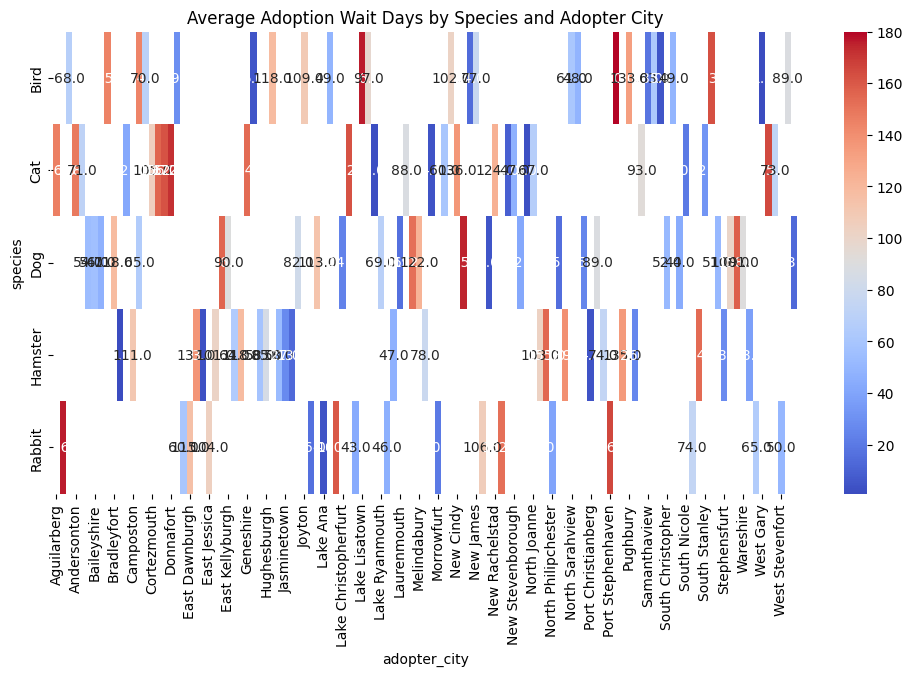

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Adoption Wait Days by Species and Adopter City')
plt.show()

In [34]:
df_adopted

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets
0,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,2024-10-10,True,2025-03-11,A0001,Megan Rogers,56,Mcgeestad,1
1,P0002,Brian,Cat,Tonkinese,1,Female,Golden,2023-09-09,True,2024-02-10,A0002,Jonathan Hawkins,18,Geneshire,2
3,P0004,Karl,Dog,German Shepherd,1,Female,White,2024-07-28,True,2024-08-12,A0004,Natalie Rivera,51,North Richard,3
7,P0008,Jeanne,Hamster,Campbell's Dwarf,4,Female,Spotted,2024-06-17,True,2024-08-30,A0008,Joyce Garza,74,Port Sarachester,0
13,P0014,Robin,Rabbit,Dutch,13,Female,Black,2023-09-14,True,2024-02-13,A0014,Philip Ibarra,63,New Rachelview,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,P0189,Sandra,Bird,Parakeet,2,Male,White,2024-02-20,True,2024-06-17,A0189,Tracy Flores,48,Jaredland,4
190,P0191,Sharon,Rabbit,English Angora,6,Female,Grey,2024-04-08,True,2024-09-15,A0191,Michael Thornton,30,Lake Christopher,5
191,P0192,Sandra,Rabbit,Lionhead,7,Female,White,2025-01-21,True,2025-03-12,A0192,Diana Taylor,61,West Stevenfort,1
193,P0194,David,Bird,Cockatiel,4,Male,White,2024-10-03,True,2025-02-25,A0194,Sheryl Matthews,20,Blackchester,1


Analyze if having previous pets affects adoption speed

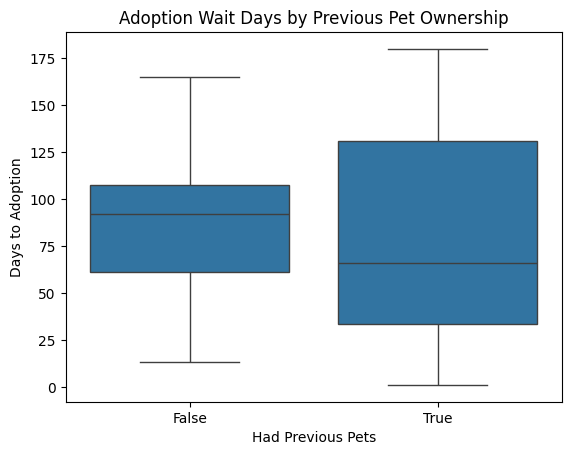

In [42]:
df['had_previous_pets'] = df['adopter_previous_pets'] > 0

df_adopted = df[df['adopted'] == True]
# Convert date columns to datetime (if not already)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['adoption_date'] = pd.to_datetime(df['adoption_date'])

# Create wait_day column (only for adopted pets)
df['wait_day'] = (df['adoption_date'] - df['arrival_date']).dt.days


sns.boxplot(data=df_adopted, x='had_previous_pets', y='wait_day')
plt.title('Adoption Wait Days by Previous Pet Ownership')
plt.xlabel('Had Previous Pets')
plt.ylabel('Days to Adoption')
plt.show()
